# MNIST

## Data Download

In [6]:
!cd ../benchmark/datasets/mnist && mkdir -pv data/raw

9913344it [00:53, 185842.33it/s]                                                
Extracting data/raw/raw/MNIST/raw/train-images-idx3-ubyte.gz to data/raw/raw/MNIST/raw

29696it [00:00, 8071154.20it/s]                                                 
Extracting data/raw/raw/MNIST/raw/train-labels-idx1-ubyte.gz to data/raw/raw/MNIST/raw

1649664it [00:09, 172234.61it/s]                                                
Extracting data/raw/raw/MNIST/raw/t10k-images-idx3-ubyte.gz to data/raw/raw/MNIST/raw

5120it [00:00, 17718511.95it/s]                                                 
Extracting data/raw/raw/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/raw/raw/MNIST/raw

Processing...
/Users/densechen/miniconda3/envs/openfed/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You

### Valid dataset

In [1]:
from benchmark.datasets.mnist import get_mnist
from torchvision.transforms import ToTensor

dataset = get_mnist('../benchmark/datasets/mnist/data/', total_parts=100)

x, y = dataset[0]

print(x.shape, y.shape)

torch.Size([1, 28, 28]) torch.Size([])


## FedAvg

In [1]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim fedavg\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## FedEla

In [2]:
!python -m openfed.tools.simulator --nproc 16 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --tst_num_parts 15\
    --epochs 1\
    --rounds 40\
    --act_clts 15\
    --tst_act_clts 15\
    --max_acg_step -1\
    --optim fedela\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## Plot Curves

In [5]:
%matplotlib inline

from benchmark.utils.plot import plot

partition = "dirichlet"
task_name = "mnist"

items = dict(
    FedAvg=f'logs/{task_name}/fedavg_{partition}/{task_name}.json',
    # FedSgd=f'logs/{task_name}/fedsgd_{partition}/{task_name}.json',
    FedEla=f'logs/{task_name}/fedela_{partition}/{task_name}.json',
    # FedProx=f'logs/{task_name}/fedprox_{partition}/{task_name}.json',
    # FedScaffold=f'logs/{task_name}/fedscaffold_{partition}/{task_name}.json',
)

files = items.values()
labels = items.keys()

### Train Accuracy

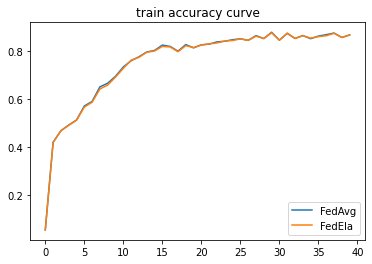

In [7]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode='train'
)

### Train Loss

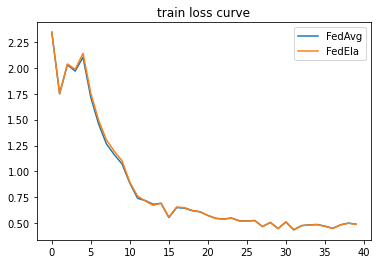

In [8]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode="train"
)

### Test Accuracy

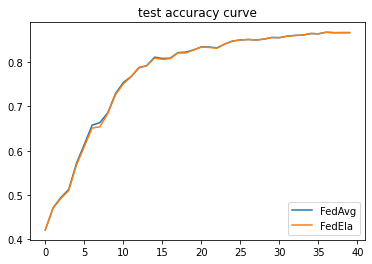

In [9]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode="test"
)

### Test Loss

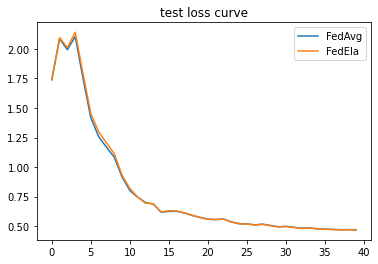

In [10]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode='test'
)